In [22]:
import os, csv, snappy
from pathlib import Path
from netCDF4 import Dataset
import pandas as pd
import numpy as np
from snappy import HashMap
import gc   
from snappy import GPF
jpy = snappy.jpy
from snappy import ProductIO, File

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

In [23]:
##init variables
File = jpy.get_type('java.io.File') #file type   

pc_base_directory = ('C:/Sentinel 3 Data/') 
laptop_base_directory = ('C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/MassThesis/src/TIF/AllBandsTiff')

base_directory = laptop_base_directory
k=0
path = Path(base_directory)
print(path)


C:\Users\Massimo\Documents\SchoolFolder\ThirdYear\Thesis\MassThesis\src\TIF\AllBandsTiff


In [24]:
#CSV
def write_to_csv( sat, date_format, sensor, time_format, full_name, lst_mean, lst_max, ndvi):
    #print(sat, date_format, sensor, time_format)
    with open('ProcessedDataCSV.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["File Name", "Satellite", "Sensor", "Date", "Time", "LST Mean", "LST Max", "NDVI Mean"])

        for i in range(len(sat)):
            writer.writerow([full_name[i], sat[i], sensor[i], date_format[i], time_format[i], lst_mean[i], lst_max[i], ndvi[i]]) 

##########################################


In [26]:
## Details about Products
full_name = []
product_name = []
sat = []
sensor = []
date_format = []
time_format = []

lst_mean = []
lst_max = []

lst_urb_max = [] #hottest pixel
lst_urb_mean = [] #average temp of study area
lst_sur = [] #average temp of surrounding study area

suhi_max = []
suhi_mean = []

ndvi = []

##########################################

Directory open:
['C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/MassThesis/src/TIF/AllBandsTiff']
LST mean:
293.93243 Kelvin
20.93243408203125 Celcius
Max LST Pixel value: 
308.452 Kelvin
35.451995849609375 Celcius

NDVI mean:
0.46885878


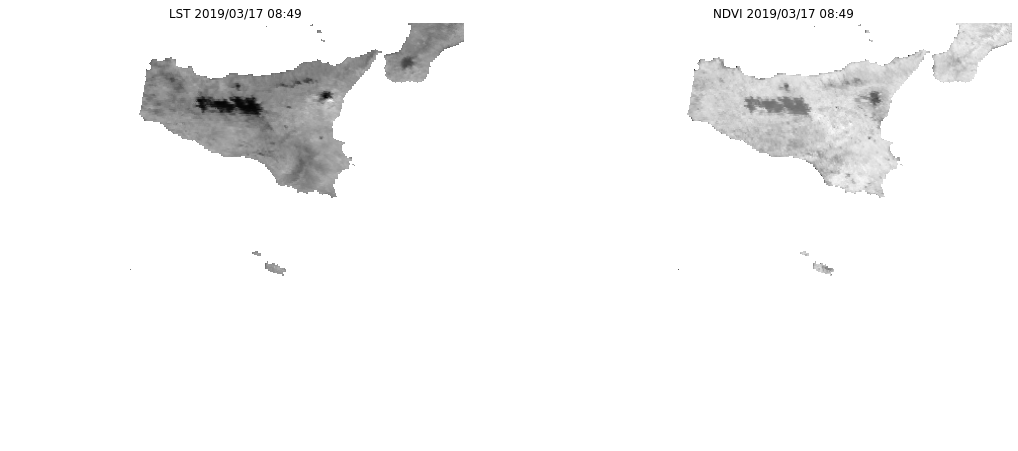

LST mean:
294.7442 Kelvin
21.74420166015625 Celcius
Max LST Pixel value: 
304.542 Kelvin
31.5419921875 Celcius

NDVI mean:
0.41144907


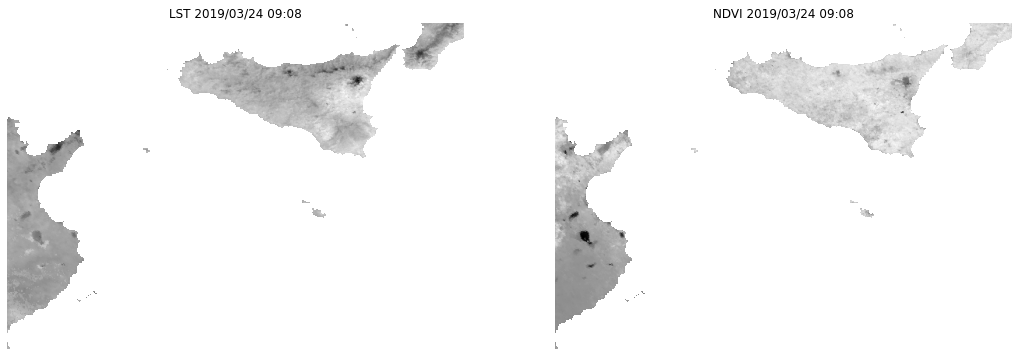

LST mean:
311.76974 Kelvin
38.769744873046875 Celcius
Max LST Pixel value: 
324.564 Kelvin
51.563995361328125 Celcius

NDVI mean:
0.32884544


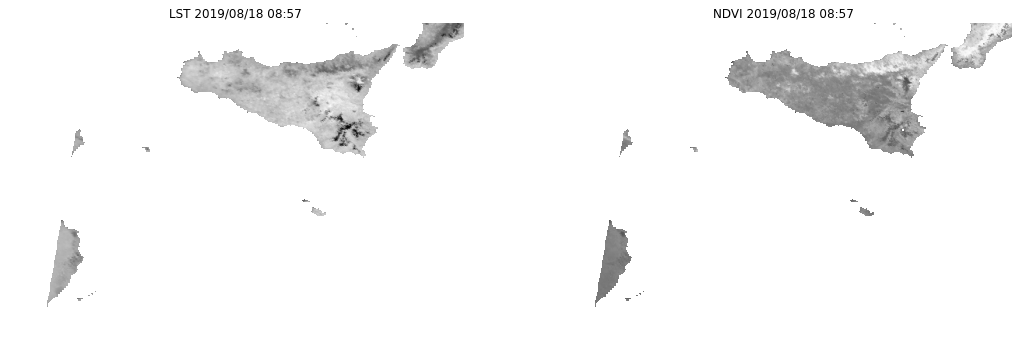

LST mean:
312.84552 Kelvin
39.84552001953125 Celcius
Max LST Pixel value: 
323.502 Kelvin
50.50201416015625 Celcius

NDVI mean:
0.34961942


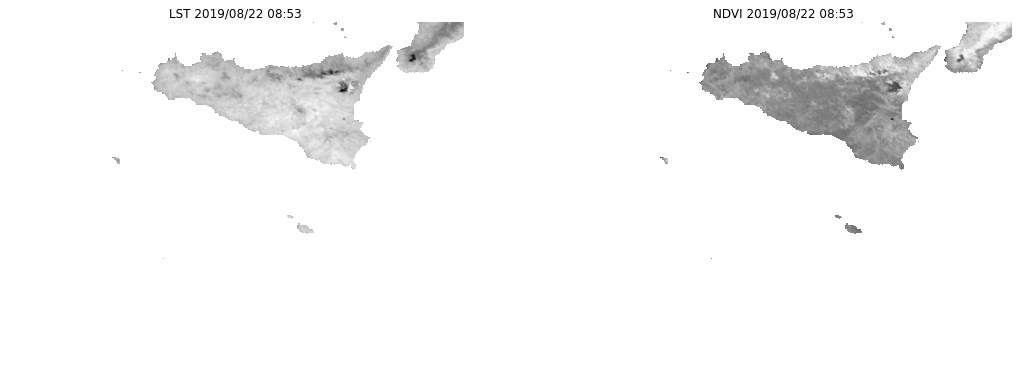

LST mean:
284.7294 Kelvin
11.729400634765625 Celcius
Max LST Pixel value: 
311.074 Kelvin
38.074005126953125 Celcius

NDVI mean:
0.17081289


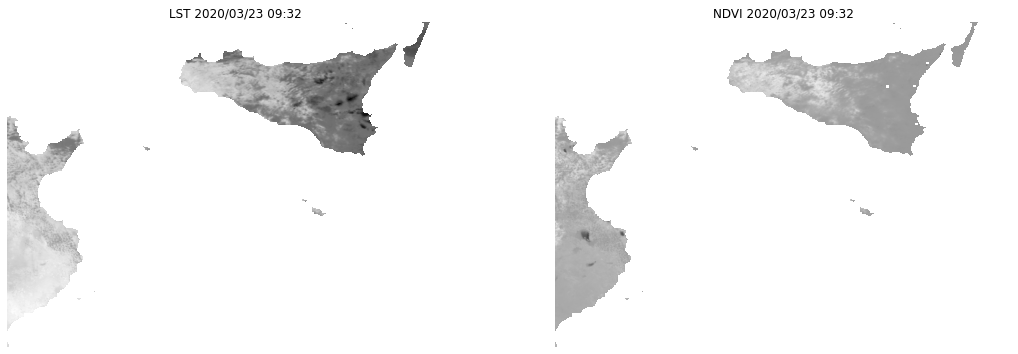

LST mean:
277.37015 Kelvin
4.370147705078125 Celcius
Max LST Pixel value: 
305.106 Kelvin
32.105987548828125 Celcius

NDVI mean:
0.081906356


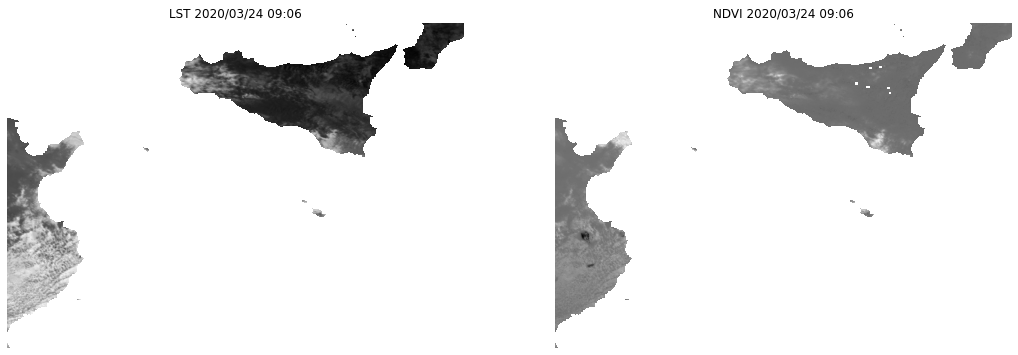



full_name:
['Subset_projected_S3A_SL_2_LST____20190317T084957_20190317T085257_20210119T200650_0179_042_278_2340_LR1_R_NT_004.SEN3.tif', 'Subset_projected_S3A_SL_2_LST____20190324T090841_20190324T091141_20210119T205008_0179_042_378_2340_LR1_R_NT_004.SEN3.tif', 'Subset_projected_S3A_SL_2_LST____20190818T085729_20190818T090029_20210120T113758_0179_048_164_2340_LR1_R_NT_004.SEN3.tif', 'Subset_projected_S3A_SL_2_LST____20190822T085344_20190822T085644_20210120T115915_0179_048_221_2340_LR1_R_NT_004.SEN3.tif', 'Subset_projected_S3A_SL_2_LST____20200323T093223_20200323T111323_20200324T165625_6059_056_193______LN2_O_NT_004.SEN3.tif', 'Subset_projected_S3A_SL_2_LST____20200324T090613_20200324T104712_20200325T162341_6059_056_207______LN2_O_NT_004.SEN3.tif']


sat:
['S3A', 'S3A', 'S3A', 'S3A', 'S3A', 'S3A']


sensor:
['SL_2_LST', 'SL_2_LST', 'SL_2_LST', 'SL_2_LST', 'SL_2_LST', 'SL_2_LST']


date_format:
['2019/03/17', '2019/03/24', '2019/08/18', '2019/08/22', '2020/03/23', '2020/03/24']


time_fo

In [27]:
for root, dirs, files in os.walk(base_directory):
    path = root.split(os.sep)

    #print(os.path.join(root, name))

    print('Directory open:')
    print(path)
    #print('\n\nProduct Names:')    
    
    ###Gathering Product details such as date & time and storing them
    for name in files:
        #
        #print(name)
        ##populating full_name[]
        full_name.append(str(name))

        temp_product = str(name)[17:46] #30chars include: (0-2)Sat, (4-8)Sensor, (13-31)Type, Year, Month, Date, Time
        product_name.append(temp_product) 

        sat.append(temp_product[:3])
        sensor.append(temp_product[4:12])

        date = temp_product[16:24]
        date = date[:4] + '/' + date[4:6] + '/' + date[6:]
        date_format.append(date)

        time = temp_product[25:29]
        time = time[:2] + ':' + time[2:]
        time_format.append(time)

        ####
        ####
        #product to be used
        product_path = str(os.path.join(root, name))
        archi=File(product_path)

        product = ProductIO.readProduct(archi)
        reader = snappy.ProductIO.getProductReader('SEN3')

        # Get LST Band
        lst_band = product.getBand('LST')
        lst_w = product.getSceneRasterWidth() # Get Band Width
        lst_h = product.getSceneRasterHeight() # Get Band Height

        # Get NDVI Band
        ndvi_band = product.getBand('NDVI')
        ndvi_w = product.getSceneRasterWidth() # Get Band Width
        ndvi_h = product.getSceneRasterHeight() # Get Band Height

        # Create empty arrays
        lst_band_data = np.zeros(lst_w * lst_h, np.float32)
        ndvi_band_data = np.zeros(ndvi_w * ndvi_h, np.float32)

        # Populate arrays with pixel value
        lst_band.readPixels(0, 0, lst_w, lst_h, lst_band_data) 
        ndvi_band.readPixels(0, 0, ndvi_w, ndvi_h, ndvi_band_data)

        # Reshape
        lst_band_data.shape = lst_h, lst_w
        ndvi_band_data.shape = ndvi_h, ndvi_w

        ##Collecting Data
        #LST
        no_nan_lst_band_data = lst_band_data[~np.isnan(lst_band_data)]
        print('LST mean:')
        mean = np.mean(no_nan_lst_band_data)
        print(str(mean) + ' Kelvin')
        print(str(mean - 273) + ' Celcius')
        lst_mean.append(mean)

        print('Max LST Pixel value: ')
        max = np.amax(no_nan_lst_band_data)
        print(str(max) + ' Kelvin')
        print(str((max - 273)) + ' Celcius')
        lst_max.append(max)

        #NDVI
        no_nan_ndvi_band_data = ndvi_band_data[~np.isnan(ndvi_band_data)]
        print('\nNDVI mean:')
        mean = np.mean(no_nan_ndvi_band_data)
        print(str(mean))        
        ndvi.append(mean)

        ##
        ##Heatmap colours
        color = cm.jet
        color.set_bad('white')
        # Plot the band  
        plt.figure(figsize=(18,10))
        plt.subplot(121)
        #plt.imshow(lst_band_data, cmap=color), plt.title('LST')
        plt.imshow(lst_band_data, cmap= 'gray'), plt.title('LST ' + date + ' ' + time)
        plt.axis('off')
        plt.subplot(122)
        #plt.imshow(ndvi_band_data, cmap =color), plt.title('NDVI')
        plt.imshow(ndvi_band_data, cmap = 'gray'), plt.title('NDVI ' + date + ' ' + time)
        plt.axis('off')
        plt.show()



In [28]:
write_to_csv(sat, date_format, sensor, time_format, full_name, lst_mean, lst_max, ndvi)